<a href="https://colab.research.google.com/github/Niharikasingh722/Neural-Networks/blob/main/cifar_10_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
#import matplotlib.pylot as plt
from matplotlib import pyplot as plt
import numpy as np


In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.test.is_built_with_cuda()

True

In [4]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
def plt_index(X,id):
  plt.figure(figsize=(10,1))
  plt.imshow(X[id])

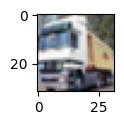

In [8]:
plt_index(X_train,1)

In [9]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
y_train[1]

array([9], dtype=uint8)

In [11]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [12]:
classes[y_train[1][0]]

'truck'

Scaling X Values, all values between 0-255, hence dividing them by 255

In [13]:
X_train=X_train/255
X_test=X_test/255

encoding y with OHE

In [14]:
y_train_ohe=keras.utils.to_categorical(y_train,num_classes=10,dtype='float32')
y_test_ohe=keras.utils.to_categorical(y_test,num_classes=10,dtype='float32')

In [15]:
y_train_ohe[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [16]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [17]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
model.fit(X_train,y_train_ohe,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 12s 6ms/step - loss: 1.8920 - accuracy: 0.3268
Epoch 2/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6671 - accuracy: 0.4025
Epoch 3/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5919 - accuracy: 0.4306
Epoch 4/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5393 - accuracy: 0.4495
Epoch 5/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5041 - accuracy: 0.4619
Epoch 6/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4755 - accuracy: 0.4718
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4494 - accuracy: 0.4799
Epoch 8/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4273 - accuracy: 0.4892
Epoch 9/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4069 - accuracy: 0.4969
Epoch 10/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3

In [25]:
y_pred=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [26]:
y_pred[0]

array([4.8658745e-03, 7.2798547e-03, 8.2631472e-05, 9.6990663e-01,
       8.2063135e-03, 1.4559397e-03, 1.8364212e-06, 4.2343565e-04,
       2.3309076e-07, 7.7771768e-03], dtype=float32)

In [27]:
y_pred_classes=[np.argmax(i) for i in y_pred]

In [28]:
y_pred_classes[:5]

[3, 9, 0, 8, 4]

In [31]:
y_test_ohe=keras.utils.to_categorical(y_test,num_classes=10)

In [32]:
model.evaluate(X_test,y_test_ohe)

313/313 [==============================] - 2s 4ms/step - loss: 1.7485 - accuracy: 0.4835


[1.7485134601593018, 0.48350000381469727]

very poor performance. lets make some changes in the model and try again


In [33]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train_ohe,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 16s 9ms/step - loss: 1.8960 - accuracy: 0.3150
Epoch 2/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.6857 - accuracy: 0.3919
Epoch 3/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.6045 - accuracy: 0.4222
Epoch 4/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5499 - accuracy: 0.4424
Epoch 5/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5089 - accuracy: 0.4570
Epoch 6/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4797 - accuracy: 0.4663
Epoch 7/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4474 - accuracy: 0.4771
Epoch 8/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4151 - accuracy: 0.4897
Epoch 9/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.3852 - accuracy: 0.4999
Epoch 10/50
1563/1563 [==============================] - 14s 9ms/step - l

Accuracy looks considerable better with 2 hidden layers

In [41]:
y_pred=model.predict(X_test)
y_pred_ohe=[np.argmax(i) for i in y_pred]

313/313 [==============================] - 1s 2ms/step


In [48]:
y=y_test.reshape(10000,)

In [38]:
#y_pred_ohe=keras.utils.to_categorical(y_pred_ohe,num_classes=10)

In [39]:
y_pred_ohe.shape

(10000, 10)

Text(95.72222222222221, 0.5, 'true')

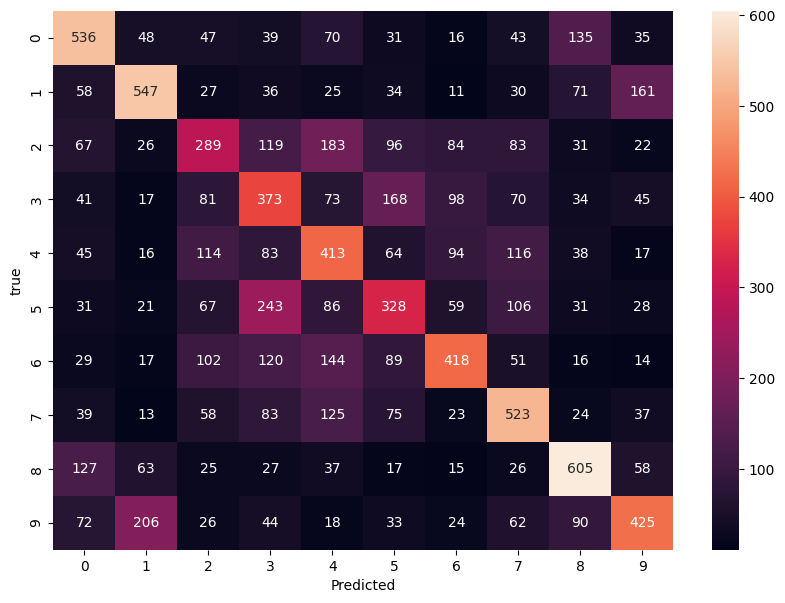

In [49]:
cm=tf.math.confusion_matrix(labels=y,predictions=y_pred_ohe)


import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("true")